In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import pylab as pl
%matplotlib inline

In [2]:
df = pd.read_csv("FuelConsumption.csv")
df.head()

,MODELYEAR,MAKE,MODEL,VEHICLECLASS,ENGINESIZE,CYLINDERS,TRANSMISSION,FUELTYPE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,FUELCONSUMPTION_COMB_MPG,CO2EMISSIONS
0,2014,ACURA,ILX,COMPACT,2.0,4,AS5,Z,9.9,6.7,8.5,33,196
1,2014,ACURA,ILX,COMPACT,2.4,4,M6,Z,11.2,7.7,9.6,29,221
2,2014,ACURA,ILX HYBRID,COMPACT,1.5,4,AV7,Z,6.0,5.8,5.9,48,136
3,2014,ACURA,MDX 4WD,SUV - SMALL,3.5,6,AS6,Z,12.7,9.1,11.1,25,255
4,2014,ACURA,RDX AWD,SUV - SMALL,3.5,6,AS6,Z,12.1,8.7,10.6,27,244


In [3]:
ds = df[['ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB', 'CO2EMISSIONS']]
ds.head()

,ENGINESIZE,FUELCONSUMPTION_CITY,FUELCONSUMPTION_HWY,FUELCONSUMPTION_COMB,CO2EMISSIONS
0,2.0,9.9,6.7,8.5,196
1,2.4,11.2,7.7,9.6,221
2,1.5,6.0,5.8,5.9,136
3,3.5,12.7,9.1,11.1,255
4,3.5,12.1,8.7,10.6,244


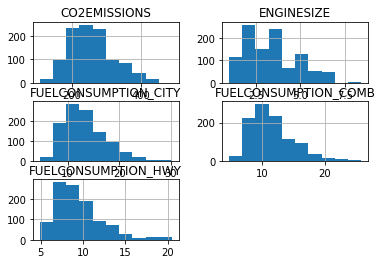

In [6]:
ds.hist()
plt.show()

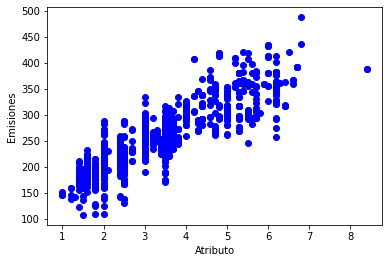

In [18]:
plt.scatter(ds.ENGINESIZE, ds.CO2EMISSIONS, color = 'blue')
plt.xlabel("Atributo")
plt.ylabel("Emisiones")
plt.show()

In [19]:
msk = np.random.rand(len(ds)) < 0.8

train = ds[msk]
test = ds[~msk]

In [20]:
from sklearn import linear_model
regr = linear_model.LinearRegression()

train_x = np.asanyarray(train[['ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
train_y = np.asanyarray(train[['CO2EMISSIONS']])
regr.fit(train_x, train_y)

print("Coeficientes: ", regr.coef_)
print("Bias: ", regr.intercept_)

Coeficientes:  [[ 18.82004102 -12.66224064 -15.16588391  36.58520283]]
Bias:  [81.27022369]


In [22]:
test_x = np.asanyarray(test[['ENGINESIZE', 'FUELCONSUMPTION_CITY', 'FUELCONSUMPTION_HWY', 'FUELCONSUMPTION_COMB']])
test_y = np.asanyarray(test[['CO2EMISSIONS']])

print("Accuracy: %.3f" % regr.score(test_x, test_y))

Accuracy: 0.867
